Tarea práctica 2 - Análisis Numérico

Edison Santiago Tutalcha Bastidas 

Código: 1927038-3147


**Ejercicio 1.** Dada la función; $$f(x) = e^{-x} + x - 2 $$

  **a)** Realice un programa para encuentrar el cero de la funcion utilizando el metodo de la bisección y estime el orden de convergencia del metodo.

  **b)** Realice un programa para encuentrar el cero de la funcion utilizando el metodo de Newton y estime el orden de convergencia del metodo.  \\

**Solución:**

**a)** Podemos revisar la continuidad de la función (para poder emplear el método de la bisección), graficando la función $f(x)$:

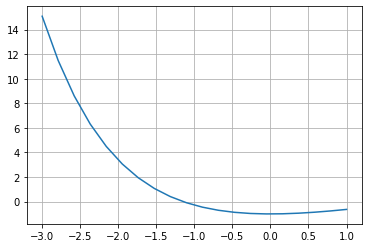

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 1 , 20)
y = np.exp(-1*x) + x - 2
plt.plot(x,y)
plt.grid()
plt.show()

Ahora, como graficamente podemos ver que la función es continua al menos en un intervalo cercano a un cero de la función, procedemos con el método:

In [48]:
import numpy as np

lista_de_xn=[]

def biseccion(a,b,biseccion,n): #Definimos la funcion sobre el intervalo [a,b] dado un numero n de iteraciones

  for k in range(n):
    xn=(a+b)/2 #Punto medio del intervalo

    valor=biseccion(a)*biseccion(xn) #Va a ser nuestro valor a comprobar 

    if valor>0:
      a=xn
      lista_de_xn.append(xn) #Agregamos los valores a la lista 
    elif valor<0:
      b=xn
      lista_de_xn.append(xn)
    else:
      break 
  print("El cero de la funcion se encuentra en x = ",xn)        

#Aplicamos la funcion "biseccion" sobre los valores comprendidos en [-2,1]

def f(x):
  return np.e**(-x)+x-2
biseccion(-3,0,f,20)



# PARA EL ORDEN DE CONVERGENCIA

xn = np.array( lista_de_xn )
#Tomamos como punto fijo, el ultimo valor de la sucesion
p = xn[-1]
xnp1 = xn[-2]
xn   = xn[-3]

Numerador   = np.abs( xnp1  - p  )
Denominador = np.abs( xn    - p  )


L     = 0.1
alpha = 0.1

while 0<L: 
  L = Numerador / (Denominador**alpha )
  print("valor de L",L)

  if 1 <= L:
    break
  else: 
    alpha += 0.1   

print("alpha es = " , alpha)


El cero de la funcion se encuentra en x =  -1.1461915969848633
valor de L 9.186648121950883e-06
valor de L 2.949801704302617e-05
valor de L 9.471713707979495e-05
valor de L 0.00030413353017956973
valor de L 0.0009765625
valor de L 0.0031357092256259003
valor de L 0.010068656484019592
valor de L 0.032330116123236635
valor de L 0.10381091163462634
valor de L 0.33333333333333287
valor de L 1.0703220823469726
alpha es =  1.0999999999999999



**b)** Note que el intervalo de validez de la funcion:

\begin{eqnarray}
   e^{-x} + x - 2  &=&0
\end{eqnarray}

Definiendo $g(x)$ como 

$$g(x)= 2 - e^{-x} $$

Tiene validez en el intervalo donde:

$$ \Big| \dfrac{d g(x)}{d x} \Big| =  \big| e^{-x}  \big| <1 \qquad \text{para  todo } x>0 $$ 

Luego buscamos soluciones de la ecuación para x positivos.



In [57]:
#INTENTO FALLIDO

#import sympy as sp
#import numpy as np

#def f(x):
#  funcion=2-np.exp(-1*x)
#  return funcion

#def df(x): 
#  return np.exp(-x)

#def NR(x0,precision,iteraciones):
#  for k in range(iteraciones):
#    x1=x0-(f(x0)/df(x0))

#    if (np.abs(x1-x0)<precision):

#      print("x",k+1, "=",x1, "es la raiz")
#      return

#    x1=x0
#    print("x",k+1, "=",x1)

#NR(1,1,10)

#---------------------------------------------------------------------------------------------------------------

# NUEVO INTENTO

import numpy as np
import sympy as sp

lista_de_xn=[]

def f(x):
  return np.e**(-x)+x-2
def df(x):
  return -np.e**(-x)+1  

def metodo_NR(f,df,xn,n):#Definimos la funcion tal que tenga por entradas la función a evaluar, su derivada, el valor inicial y el numero n de iteraciones respectivamente

  for k in range(n):
    x1=xn-(f(xn)/df(xn)) #Metodo de Newton-Raphson

    while f(x1)!=0:
      x1=xn-(f(xn)/df(xn))
      xn=x1
      lista_de_xn.append(x1) #Agregamos nuestros valores a la lista en blanco

  print("El cero de la funcion se encuentra en x = ",xn)    

#Aplicamos la funcion con los parametros solicitados y con nuestra funcion inicial
metodo_NR(f,df,-2,20)


# PARA EL ORDEN DE CONVERGENCIA

xn=np.array( lista_de_xn )
#Tomamos como punto fijo, el ultimo valor de la sucesion
p= xn[-1]
xnp1=xn[-2]
xn=xn[-3]

Numerador   = np.abs( xnp1  - p  )
Denominador = np.abs( xn    - p  )


L     = 0.1
alpha = 0.1

while 0<L: 
  L = Numerador / (Denominador**alpha )
  print("valor de L",L)

  if 1 <= L:
    break
  else: 
    alpha += 0.1   

print("alpha es = " , alpha)



El cero de la funcion se encuentra en x =  -1.1461932206205827
valor de L 6.191370648972156e-11
valor de L 2.098749067898247e-10
valor de L 7.114333642317157e-10
valor de L 2.4116148018062903e-09
valor de L 8.174885020428903e-09
valor de L 2.7711202073887753e-08
valor de L 9.393535425401637e-08
valor de L 3.184217976289906e-07
valor de L 1.079385307166632e-06
valor de L 3.6588972551580463e-06
valor de L 1.2402919545889614e-05
valor de L 4.204338152566299e-05
valor de L 0.00014251853554095385
valor de L 0.0004831089278663302
valor de L 0.0016376412745069736
valor de L 0.005551271751100536
valor de L 0.01881768524907533
valor de L 0.06378813612629686
valor de L 0.21622884305958506
valor de L 0.732971919391319
valor de L 2.484626135044107
alpha es =  2.1000000000000005


**Ejercicio 2.**   Utilice el teorema del valor medio para determinar el intervalo en el que se puede utilizar el método de punto fijo para encontrar soluciones de la siguiente ecuación:

$$\sin(x)-2x+a=0$$.

-  Escoja 3 valores para el parámetro $a$ e implemente el metodo del punto fijo de punto fijo. 

- Compruebe la convergencia si las condiciones iniciales del método de punto fijo están por fuera de los intervalos calculados en el item 1.

**Solución:**

**a)** Intervalo de validez:

\begin{eqnarray}
   sin(x)-2x+a  &=&0
\end{eqnarray}

Despejando x obtenemos:

$$ x =\frac{sin(x)+a}{2} $$

De donde definimos:

$$g(x)=\frac{sin(x)+a}{2} $$ 

Note en particular que  g(x) es continua y diferenciable para todo valor de x en  $\mathbb R$.

Por el teorema de valor medio:  $\exists c \in [a,b]$ tal que:

\begin{eqnarray}
   g'(c)=\frac{g(b)-g(a)}{b-a} 
\end{eqnarray}  

Dado que la función debe representar una contracción, tenemos que:

$$ \left| g'(c) \right| 
=\left|  \frac{sin(b)-sin(a)}{2(b-a)} \right|\leq 
\left|\frac{2}{2(b-a)}\right| \leq 1
$$

De donde se debe cumplir que $b-a>1$




In [60]:
import numpy as np
import math

#Valores de "a" diferentes
a1=-5
a2=5
a3=15

#Definimos una funcion asociada al valor a1
def g1(x):
    return (math.sin(x)+a1)/2

#La intencion es siempre iniciar con valores cercanos a la raiz
xn = 4
Lista_de_xn =[xn] 
Diferencia = 1 #iniciamos la diferencia en 1

while (Diferencia > 1e-15):
                xnp1 = g1( xn )                 #hallamos el siguiente valor de la sucesion
                Diferencia = np.abs( xnp1 - xn )
                xn = xnp1                       #actualizando el valor de xn y adjuntamos a la lista43ewq2
                Lista_de_xn += [xnp1]           
                
print("El cero de la funcion para a=-5 está en x =:", xnp1  )   





#Definimos una segunda funcion asociada a nuestro valor a2

def g2(x):
    return (math.sin(x)+a2)/2

xn = 4
Lista_de_xn =[xn] 
Diferencia = 1

while (Diferencia > 1e-15):

                #hallamos el siguiente valor de la sucesion
                xnp1 = g2( xn ) 
                Diferencia = np.abs( xnp1 - xn )
                xn = xnp1    
                Lista_de_xn += [xnp1]   #Actualizamos y adjuntamos a la lista            

print("El cero de la funcion para a=5 está en x =:", xnp1  )  






#Definimos una segunda funcion asociada a nuestro valor a3
def g3(x):
    return (math.sin(x)+a3)/2

xn = 6
Lista_de_xn =[xn] 
Diferencia = 1

while (Diferencia > 1e-15):

                #hallamos el siguiente valor de la sucesion
                xnp1 = g3( xn )
                Diferencia = np.abs( xnp1 - xn )
                xn = xnp1    
                Lista_de_xn += [xnp1] #Actualizamos y adjuntamos a la lista 
                
print("El cero de la funcion para a=15 está en x =:", xnp1  )  

El cero de la funcion para a=-5 está en x =: -2.7094216109276945
El cero de la funcion para a=5 está en x =: 2.7094216109276945
El cero de la funcion para a=15 está en x =: 7.995034279123426


**b)** Note que $sin(x)-2x+a$ bajo el metodo del punto fijo no posee ceros posibles pues, dada una sucesión de puntos, no se cumple que $|f(x)|$<$1$ (Intervalos de Validez analizados en la primer parte del inciso 2.a), luego no puede converger a un punto fijo [Usando el método del punto fijo] luego para analizar los ceros de una funcion, debe recurrirse a otro método, esto pues la restricción de que $b-a>1$ no se cumple para intervalos fuera de donde $|g'(x)|\leq 1$.

Graficamente:

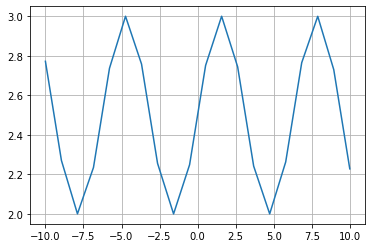

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10 , 20)
y = (np.sin(x)+5)/2
plt.plot(x,y)
plt.grid()
plt.show()
